1. Cargar Librerias

In [14]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
import networkx as nx
import matplotlib.pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection

2. Crear data frame a partir de archivo csv

In [3]:
dataframe = pd.read_csv('comtrade_trade_data.csv')
dataframe

,Period,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
0,2012,Import,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,36481708,4.522996e+08,Weight in kilograms,4.522996e+08,0
1,2012,Export,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,67030555,1.026560e+09,Weight in kilograms,1.026560e+09,0
2,2012,Import,Albania,Algeria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,28700,2.738750e+05,Weight in kilograms,2.738750e+05,0
3,2012,Import,Albania,Austria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,898,8.500000e+02,Weight in kilograms,8.500000e+02,0
4,2012,Import,Albania,Belgium,H4-2523,Salt; sulphur; earths and stone; plastering ma...,1028,1.020000e+02,Weight in kilograms,1.020000e+02,0
...,...,...,...,...,...,...,...,...,...,...,...
116812,2010,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",59578,2.910000e+05,Weight in kilograms,2.910000e+05,0
116813,2010,Import,Cook Isds,New Zealand,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",95945,1.372140e+05,Weight in kilograms,1.372140e+05,0
116814,2011,Import,Cook Isds,World,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",659681,3.845930e+05,Weight in kilograms,3.845930e+05,0
116815,2011,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",36232,7.011600e+04,Weight in kilograms,7.011600e+04,0


3. Limpieza de datos

In [4]:
dataframe.dropna()

,Period,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
0,2012,Import,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,36481708,4.522996e+08,Weight in kilograms,4.522996e+08,0
1,2012,Export,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,67030555,1.026560e+09,Weight in kilograms,1.026560e+09,0
2,2012,Import,Albania,Algeria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,28700,2.738750e+05,Weight in kilograms,2.738750e+05,0
3,2012,Import,Albania,Austria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,898,8.500000e+02,Weight in kilograms,8.500000e+02,0
4,2012,Import,Albania,Belgium,H4-2523,Salt; sulphur; earths and stone; plastering ma...,1028,1.020000e+02,Weight in kilograms,1.020000e+02,0
...,...,...,...,...,...,...,...,...,...,...,...
116812,2010,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",59578,2.910000e+05,Weight in kilograms,2.910000e+05,0
116813,2010,Import,Cook Isds,New Zealand,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",95945,1.372140e+05,Weight in kilograms,1.372140e+05,0
116814,2011,Import,Cook Isds,World,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",659681,3.845930e+05,Weight in kilograms,3.845930e+05,0
116815,2011,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",36232,7.011600e+04,Weight in kilograms,7.011600e+04,0


4. Las columnas del dataframe:

In [11]:
dataframe.columns

Index(['Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity Code',
       ' Commodity Description', 'Trade Value', 'NetWeight (kg)', 'Unit',
       'Trade Quantity', 'Flag'],
      dtype='object')

5. Los tipos de datos de cada columna:

In [12]:
dataframe.dtypes

Period                      int64
Trade Flow                 object
Reporter                   object
Partner                    object
Commodity Code             object
 Commodity Description     object
Trade Value                 int64
NetWeight (kg)            float64
Unit                       object
Trade Quantity            float64
Flag                        int64
dtype: object

6. Revisar la clasificacion de los datos (Commodity Description) para validar que todas las clasificaciones pertenecen al comercio de cemento

In [13]:
dataframe.groupby(' Commodity Description').count()

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Commodity Description,,,,,,,,,,
"Cement (portland, aluminous, slag or hydraulic)",43206,43206,43206,43206,43206,43206,43174,43206,43110,43206
"Portland cement, aluminous cement, slag cement",26205,26205,26205,26205,26205,26205,26057,26205,25759,26205
"Portland cement, aluminous cement, slag cement, supersulphate cement and similar hydraulic cements, whether or not coloured or in the form of clinkers.",24981,24981,24981,24981,24981,24981,24729,24981,23739,24981
"Salt; sulphur; earths and stone; plastering materials, lime and cement // Portland cement, aluminous cement, slag cement, supersulphate cement and similar hydraulic cements, whether or not coloured or in the form of clinkers.",22425,22425,22425,22425,22425,22425,22123,22425,21521,22425


7. Revisar las opciones de Flujo comercial

In [14]:
dataframe.groupby('Trade Flow').count()

,Period,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Trade Flow,,,,,,,,,,
Export,56642,56642,56642,56642,56642,56642,56373,56642,55389,56642
Import,57744,57744,57744,57744,57744,57744,57301,57744,56396,57744
Re-Export,2109,2109,2109,2109,2109,2109,2091,2109,2040,2109
Re-Import,322,322,322,322,322,322,318,322,304,322


8. Revisar la cantidad de países de la base de datos

In [15]:
dataframe.groupby('Reporter').count()

,Period,Trade Flow,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Reporter,,,,,,,,,,
Afghanistan,4,4,4,4,4,4,4,4,4,4
Albania,355,355,355,355,355,355,355,355,355,355
Algeria,633,633,633,633,633,633,633,633,633,633
Andorra,115,115,115,115,115,115,115,115,115,115
Angola,236,236,236,236,236,236,236,236,236,236
...,...,...,...,...,...,...,...,...,...,...
Viet Nam,503,503,503,503,503,503,358,503,136,503
Wallis and Futuna Isds,63,63,63,63,63,63,63,63,63,63
Yemen,255,255,255,255,255,255,253,255,235,255


9. Revisar los periodos que incluye la base datos

In [16]:
dataframe.groupby('Period').count()

,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Period,,,,,,,,,,
1988,381,381,381,381,381,381,381,381,381,381
1989,837,837,837,837,837,837,837,837,837,837
1990,943,943,943,943,943,943,943,943,943,943
1991,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
1992,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
1993,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
1994,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
1995,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
1996,3500,3500,3500,3500,3500,3500,3500,3500,3500,3500


10. Mostrar los 5 principales EXportadores por año

10.1. Filtrar la base de datos por exportadores incluyendo las columnas de Periodo y Reporter.

In [4]:
a = dataframe[ dataframe['Trade Flow']=='Export'].groupby(['Period','Reporter']).agg({'Trade Value':sum})
a

Trade Value
Period Reporter                             
1988   Australia                     4957402
       Finland                       1140180
       Fmr Fed. Rep. of Germany    304360000
       Greece                      256687618
       Haiti                            1198
...                                      ...
2016   Togo                        107040769
       Turkey                      989573008
       USA                         411898312
       United Kingdom              107268570
       Zimbabwe                      1000352

[3013 rows x 1 columns]

10.2. Agrupar con base en el valor negociado y el periodo

In [5]:
b = a['Trade Value'].groupby('Period',group_keys=False)
b

10.3. Obtener los 5 principales exportadores por año en función del valor comercializado.

In [6]:
c = b.nlargest(5)
c

Period  Reporter                
1988    Fmr Fed. Rep. of Germany    304360000
        Rep. of Korea               293992808
        Japan                       257566176
        Greece                      256687618
        Portugal                     19613178
                                      ...    
2016    Turkey                      989573008
        Germany                     972672283
        Spain                       954626136
        Japan                       782633868
        Canada                      737395524
Name: Trade Value, Length: 145, dtype: int64

10.4. Colocar el resultado en formato de data frame a través del  guardado del mismo en CSV.

In [7]:
c.to_csv('c.csv')

In [8]:
df = pd.read_csv('c.csv')
df

,Period,Reporter,Trade Value
0,1988,Fmr Fed. Rep. of Germany,304360000
1,1988,Rep. of Korea,293992808
2,1988,Japan,257566176
3,1988,Greece,256687618
4,1988,Portugal,19613178
...,...,...,...
140,2016,Turkey,989573008
141,2016,Germany,972672283
142,2016,Spain,954626136
143,2016,Japan,782633868


11. Visualizar los 5 principales Exportadores por año

In [9]:
bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('Trade Value', stack='zero'),
    y=alt.Y('Period:N'),
    color=alt.Color('Reporter')
).properties(width=1500)

text = alt.Chart(df).mark_text(dx=-15, dy=3, color='black').encode(
    x=alt.X('Trade Value', stack='zero'),
    y=alt.Y('Period:N'),
    detail='Reporter:N',
    text=alt.Text('Reporter')
)

bars + text

alt.LayerChart(...)

11.1. Visualización alternativa de los 5 principales exportadores por año.

In [36]:
alt.Chart(df).mark_bar().encode(
    x='Reporter:O',
    y='Trade Value:Q',
    color='Reporter:N',
    column='Period:N'
)

alt.Chart(...)

PREVIO A 12

EXPORTADORES 1988

In [5]:
e = dataframe[(dataframe['Trade Flow']=='Export') & (dataframe['Period']==1988)].groupby(['Reporter','Partner']).agg({'Trade Value':sum})
e

Trade Value
Reporter    Partner                               
Australia   Areas, nes                         463
            China                            12443
            China, Hong Kong SAR             33928
            Fiji                              5125
            Indonesia                         1717
...                                            ...
Switzerland Philippines                      50659
            So. African Customs Union         1109
            Spain                              684
            United Kingdom                    2861
            World                          2174126

[223 rows x 1 columns]

In [11]:
e.groupby('Reporter').count()

,Trade Value
Reporter,
Australia,17
Finland,8
Fmr Fed. Rep. of Germany,63
Greece,24
Haiti,2
Iceland,2
India,6
Japan,37
Portugal,17


In [12]:
e.groupby('Partner').count()

,Trade Value
Partner,
Algeria,1
Angola,2
"Areas, nes",6
Australia,3
Austria,1
...,...
United Rep. of Tanzania,1
Vanuatu,2
Venezuela,1


In [6]:
e.to_csv('e.csv')

In [7]:
exporters1988 = pd.read_csv('e.csv')
exporters1988

,Reporter,Partner,Trade Value
0,Australia,"Areas, nes",463
1,Australia,China,12443
2,Australia,"China, Hong Kong SAR",33928
3,Australia,Fiji,5125
4,Australia,Indonesia,1717
...,...,...,...
218,Switzerland,Philippines,50659
219,Switzerland,So. African Customs Union,1109
220,Switzerland,Spain,684
221,Switzerland,United Kingdom,2861


EXPORTADORES 2002

In [9]:
e2002 = dataframe[(dataframe['Trade Flow']=='Export') & (dataframe['Period']==2002)].groupby(['Reporter','Partner']).agg({'Trade Value':sum})
e2002.to_csv('e2002.csv')
exporters2002 = pd.read_csv('e2002.csv')
exporters2002

,Reporter,Partner,Trade Value
0,Albania,TFYR of Macedonia,2415
1,Albania,World,2415
2,Algeria,France,1
3,Algeria,Germany,95533
4,Algeria,World,95534
...,...,...,...
2225,Zimbabwe,Mozambique,1171168
2226,Zimbabwe,Namibia,93425
2227,Zimbabwe,United Rep. of Tanzania,43171
2228,Zimbabwe,World,37187764


EXPORTADORES 2015

In [10]:
e2015 = dataframe[(dataframe['Trade Flow']=='Export') & (dataframe['Period']==2015)].groupby(['Reporter','Partner']).agg({'Trade Value':sum})
e2015.to_csv('e2015.csv')
exporters2015 = pd.read_csv('e2015.csv')
exporters2015

,Reporter,Partner,Trade Value
0,Albania,Belgium,1405
1,Albania,Bosnia Herzegovina,31876
2,Albania,Greece,95
3,Albania,Montenegro,5744612
4,Albania,Serbia,21945092
...,...,...,...
2717,Zambia,Zimbabwe,3424445
2718,Zimbabwe,Mozambique,2555250
2719,Zimbabwe,South Africa,604
2720,Zimbabwe,World,5233912


12. Prueba de visualizacion de grafos

12.1. Construcción del grafo.

In [26]:
G3=nx.Graph()

In [27]:
for idx, row in exporters1988.iterrows():
    G3.add_edge(row["Reporter"], row["Partner"], weight=row["Trade Value"])

12.1.2. Construccion del grafo 2002

In [22]:
G2=nx.Graph()
for idx, row in exporters2002.iterrows():
    G2.add_edge(row["Reporter"], row["Partner"], weight=row["Trade Value"])

12.1.3. Construccion del grafo de 2015

In [28]:
G1=nx.Graph()
for idx, row in exporters2015.iterrows():
    G1.add_edge(row["Reporter"], row["Partner"], weight=row["Trade Value"])

12.2. Visualización del grafo en forma circular.

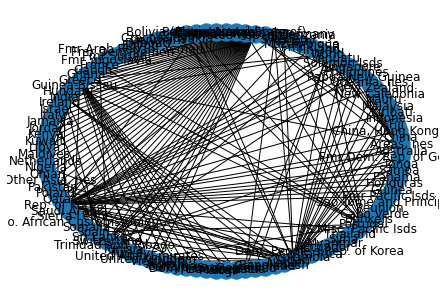

In [17]:
nx.draw_circular(G1,with_labels=True,cmap=plt.cm.Blues)
#node_size=pesos1988i
#node_color=range(154)

12.3. Visualizacion del grafo en forma aleatoria.

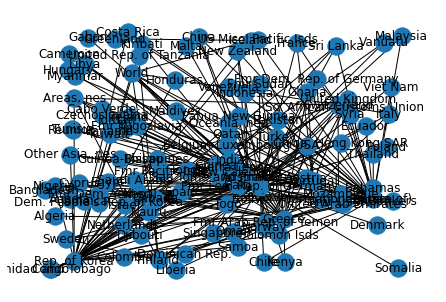

In [18]:
nx.draw_random(G1, with_labels=True)

Numero de nodos del grafo (incluye exportadores e importadores, bajo el filtro de EXPORTADORES).

In [36]:
nx.number_of_nodes(G1)

233

Numero de enlaces entre los nodos.

In [32]:
nx.number_of_edges(G1)

2300

12.5. Grafos Multilayer

12.5.1. Definicion de colores

In [15]:
cols = ['steelblue', 'darksalmon', 'mediumseagreen']

12.5.2. Suponer ubicacion comun de los nodos

In [29]:
pos = nx.spring_layout(G1) 
graphs = [G1,G2, G2]

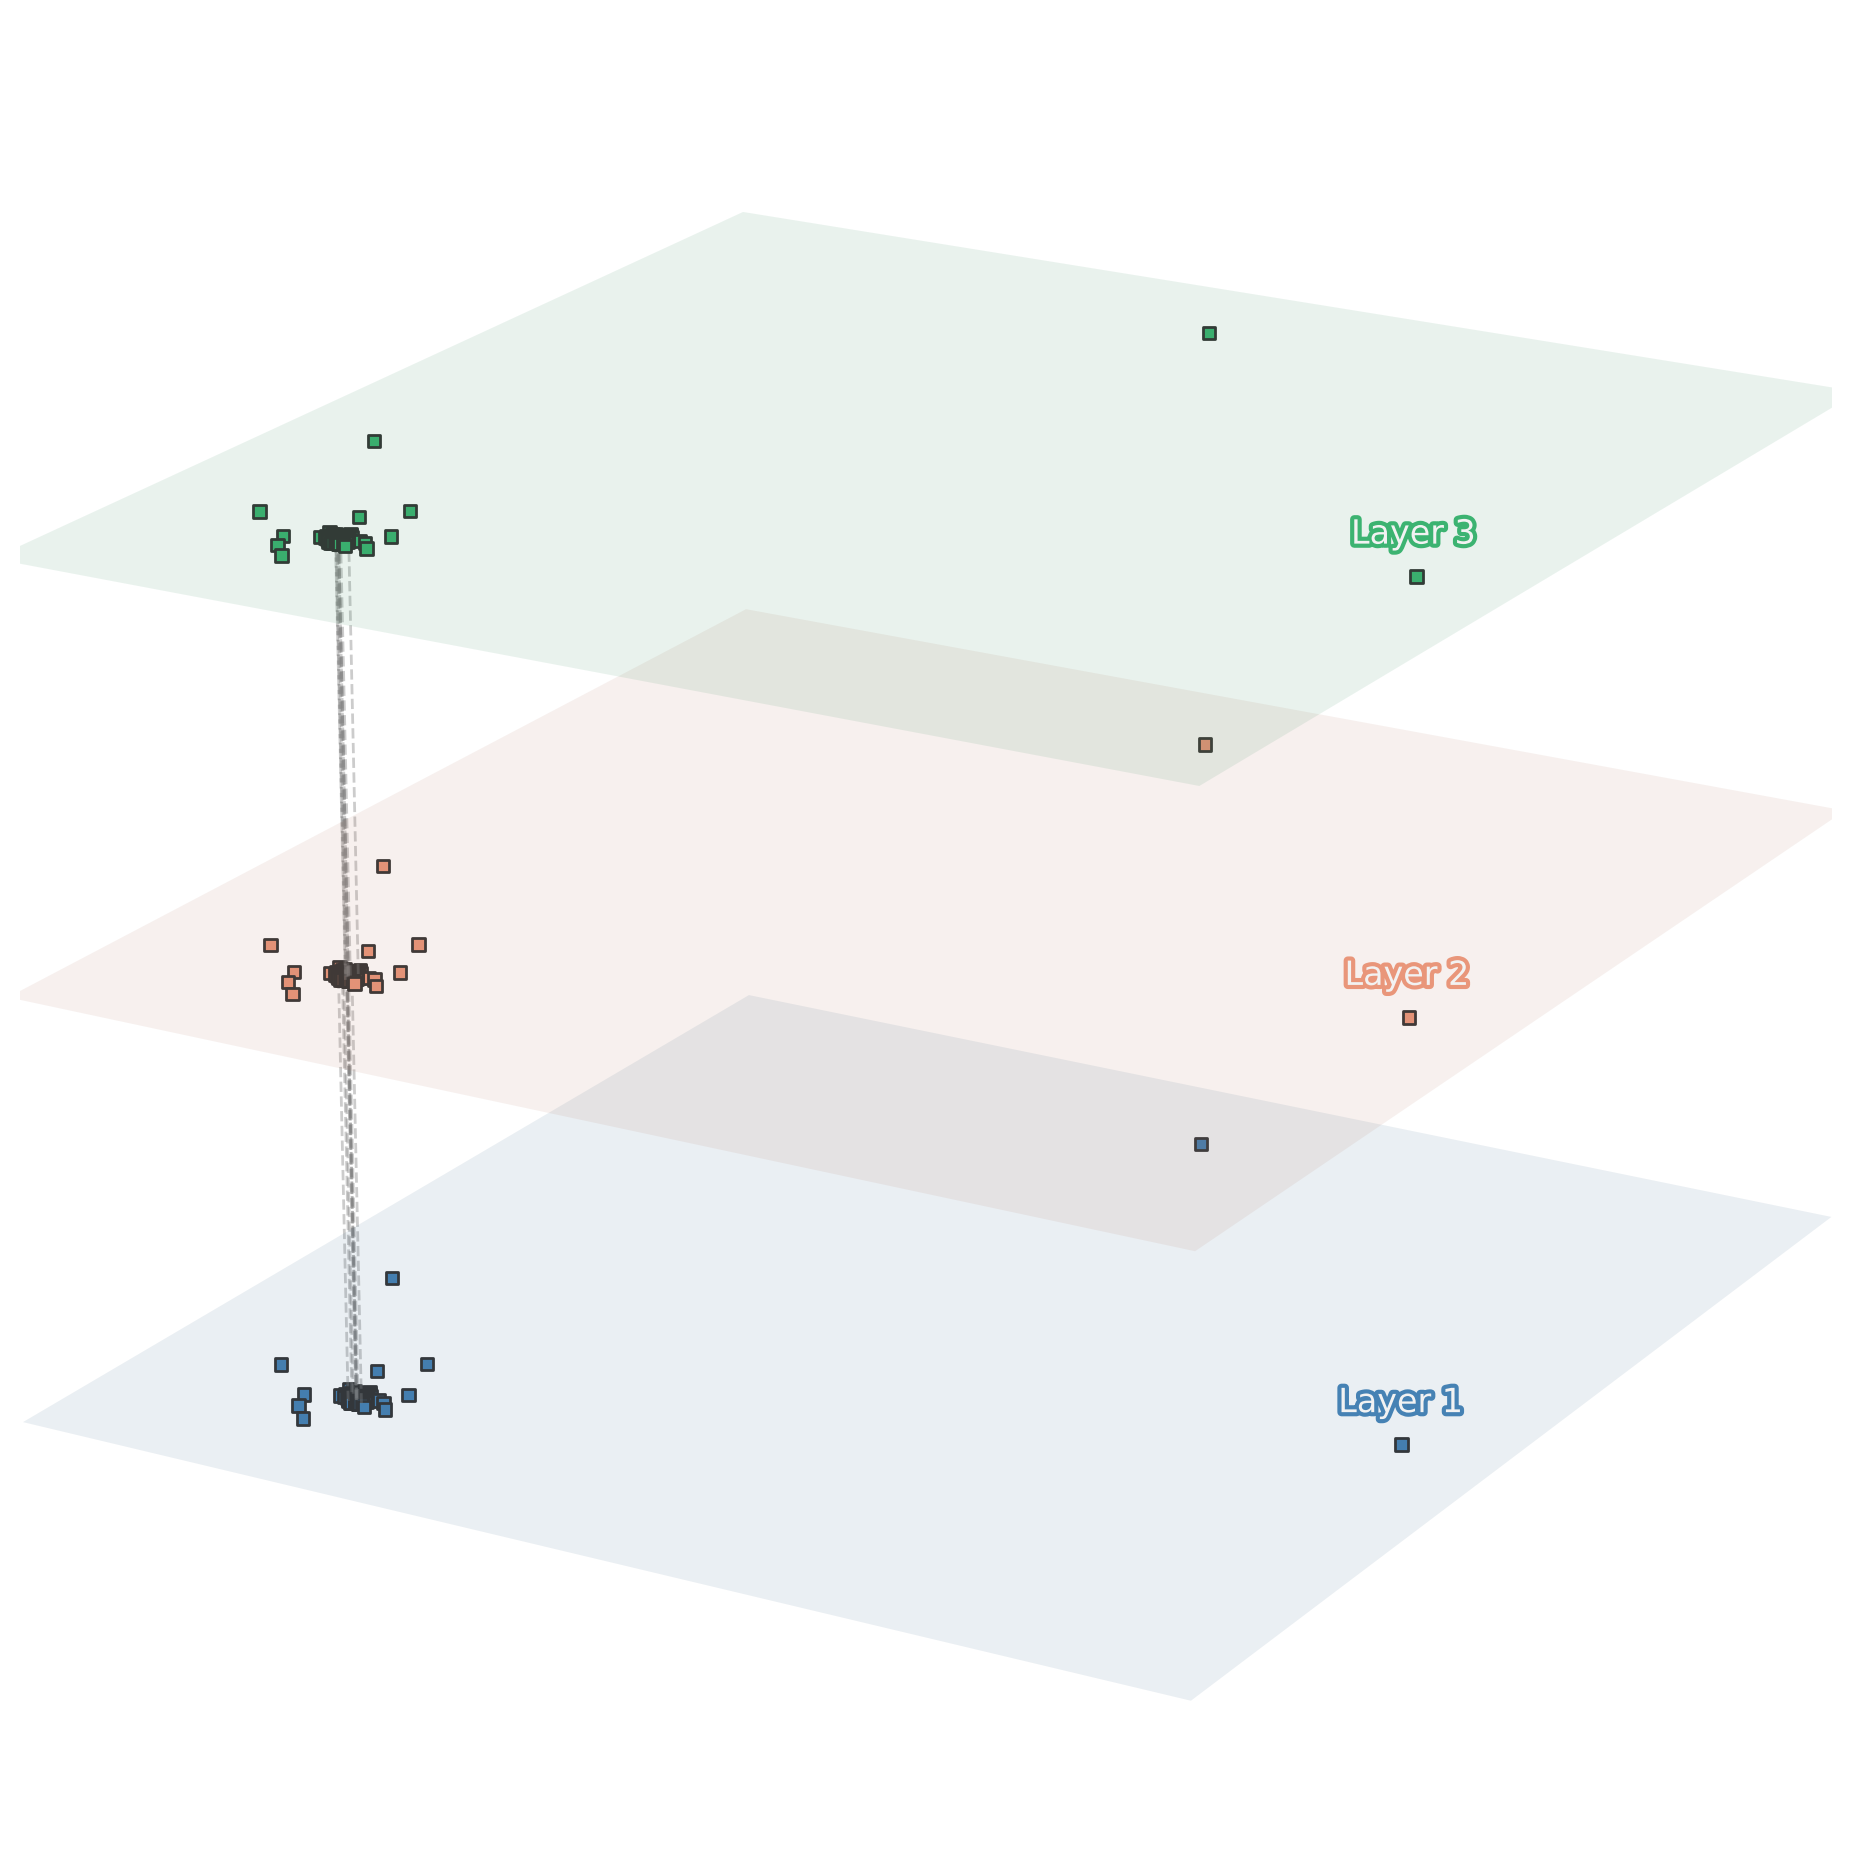

In [54]:
w = 16
h = 12

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)


    # if you want to have between-layer connections
    
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                        alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)
   

    # add within-layer edges 
    '''lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)'''

    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()

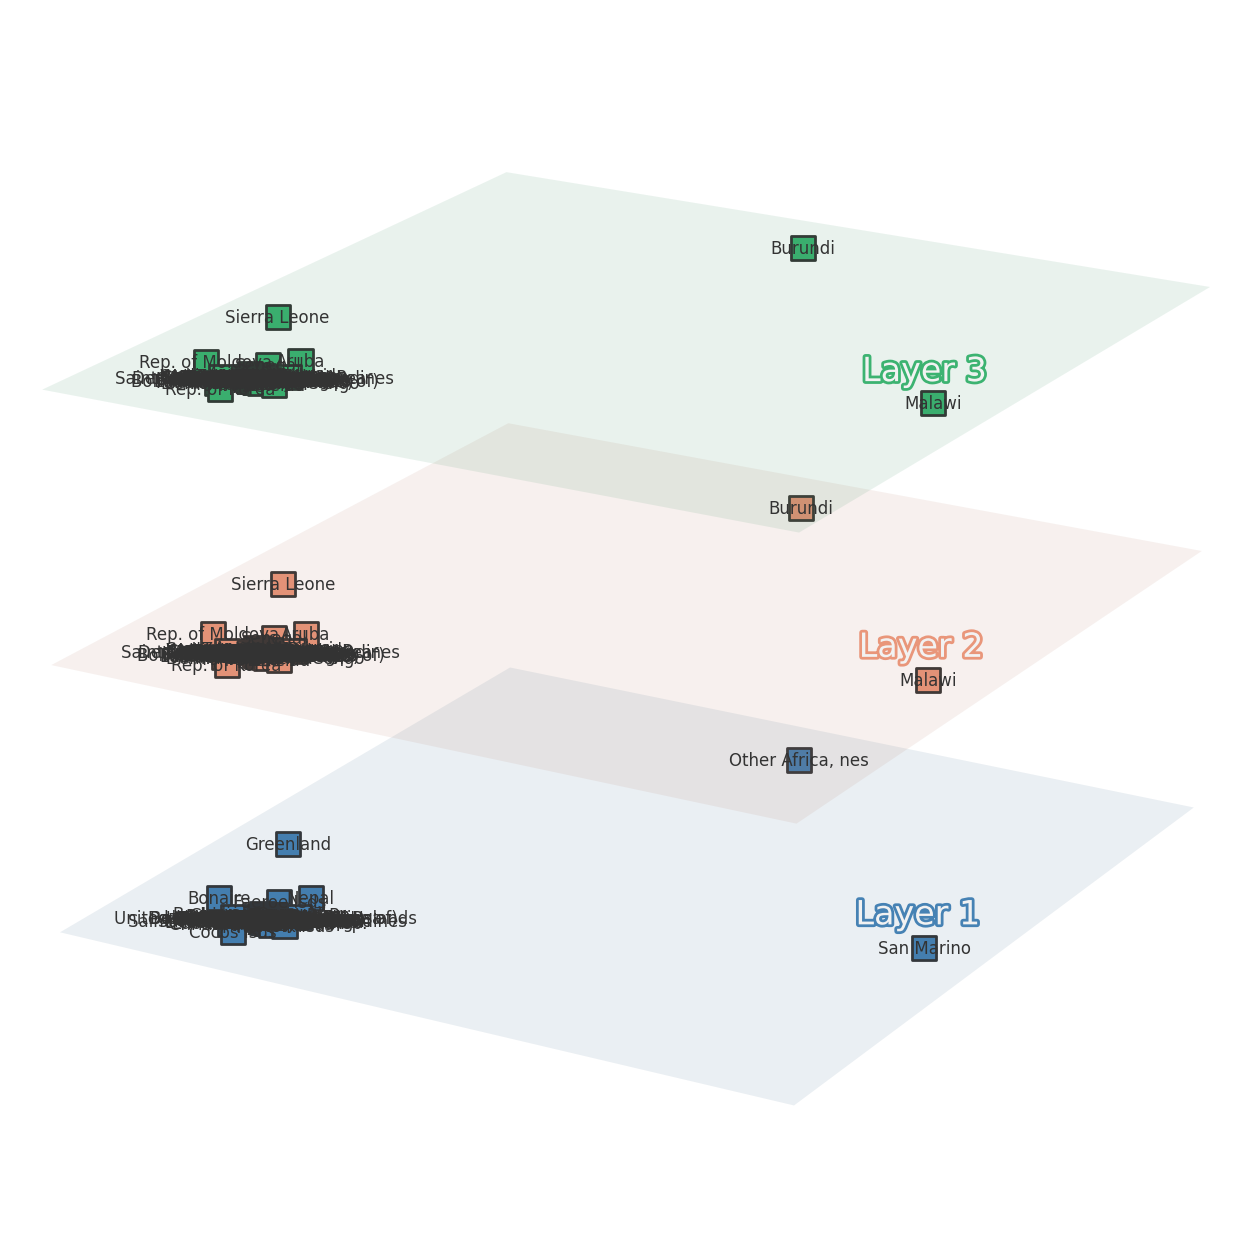

In [57]:
w = 10
h = 8

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    '''if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)'''

    # add within-layer edges 
    '''lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)'''
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, s=75, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li], lab, color='.2', zorder=gi+200, fontsize=6,
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.1, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=2, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()

# plt.savefig('multilayer_network_wlabels.png',dpi=425,bbox_inches='tight')
plt.show()

13. Analisis de Redes

De acuerdo con Newman (2010, p. 109) una red o grafo, es un conjunto de nodos (vértices) unidos por enlaces (aristas). Si un nodo tiene más de un enlace se denomina multienlace o multígrafo.
Conociendo la estructura de la red, es posible calcular algunos parámetros que capturan las características particulares de la topología de la red. Newman (2010, p. 168) considera los siguientes parámetros: el grado de centralidad, el eigenvector de centralidad, la centralidad de katz, proximidad central (closeness centrality), centralidad de intermediación (betweenness centrality), transitividad, reciprocidad, grado de distribución y el coeficiente de agrupamiento (clustering coefficient). A continuación se explicarán aquellas medidas consideradas relevantes para este trabajo.

13.1. Distribuciones de grado (degree distribution)

El elemento más característico de un nodo es su grado o su conectividad que tiene con otros nodos. El grado de un nodo (k) es definido como “[…] el número de aristas que emana de un vértice” (Serrano y Boguñá, 2008, p. 1), o bien el número de vínculos que tiene un nodo con otro nodo (Barabási y Oltvai, 2004, p. 102).



In [74]:
gC = nx.degree_centrality(G)

In [75]:
gC1988 = pd.DataFrame([[key, gC[key]] for key in gC.keys()], columns=['country',"centrality degree"])
gC1988

,country,centrality degree
0,Australia,0.178571
1,"Areas, nes",0.053571
2,China,0.026786
3,"China, Hong Kong SAR",0.026786
4,Fiji,0.008929
...,...,...
108,Honduras,0.008929
109,Panama,0.008929
110,Samoa,0.008929
111,Tonga,0.008929


Los 10 países que en 1988 tuvieron mas relaciones comerciales con otros países  exportando e importando cemento (considerando el filtro de EXPORTADORES):

In [76]:
gc1988main = gC1988.nlargest(10,'centrality degree')
gc1988main

,country,centrality degree
25,Fmr Fed. Rep. of Germany,0.562500
92,Japan,0.330357
65,Rep. of Korea,0.312500
45,Greece,0.223214
0,Australia,0.178571
101,Portugal,0.151786
72,Switzerland,0.116071
17,World,0.098214
18,Finland,0.080357
48,India,0.080357


13.2. Coeficiente de agrupamiento (clustering coefficient)

Bao-quan, Jian-hua y Wen-qi (2007), describen que en las redes se ha encontrado que si un nodo A está conectado con un nodo B y el nodo B, está conectado al nodo C, hay una gran probabilidad de que el nodo A también esté conectado con el nodo C. De esta manera el coeficiente de agrupación significa la “[…] presencia de un aumentado número de triángulos en la red” (Bao-quan, et al. 2007, p. 1262), es decir, que un grupo de tres nodos o países se encuentran conectados a cada uno de los demás. Newman (2010, p. 261) señala que el coeficiente de agrupamiento mide la probabilidad de que los dos vecinos de un nodo sean ellos mismos vecinos.

Si el coeficiente de agrupación es alto, significa que los vecinos de un nodo dado, tienen una alta probabilidad de interconexión.


13.2.1. Triangulos

In [77]:
t= nx.triangles(G)

In [78]:
t1988 = pd.DataFrame([[key, t[key]] for key in t.keys()], columns=['country',"triangles"])


In [79]:
t1988main = t1988.nlargest(10,'triangles')
t1988main

,country,triangles
25,Fmr Fed. Rep. of Germany,51
65,Rep. of Korea,50
92,Japan,37
0,Australia,29
45,Greece,15
48,India,14
17,World,13
72,Switzerland,8
13,Philippines,6
10,New Zealand,5


13.2.2. Clustering

In [80]:
cl= nx.clustering(G)
cl1988 = pd.DataFrame([[key, cl[key]] for key in cl.keys()], columns=['country',"clustering coefficient"])
cl1988main = cl1988.nlargest(15,'clustering coefficient')
cl1988main

,country,clustering coefficient
3,"China, Hong Kong SAR",1.0
5,Indonesia,1.0
6,Kiribati,1.0
7,Malaysia,1.0
9,New Caledonia,1.0
12,Papua New Guinea,1.0
15,Solomon Isds,1.0
16,Vanuatu,1.0
28,Belgium-Luxembourg,1.0
37,Egypt,1.0


China, Hong Kong SAR	tiene clustering coefficient igual a 1 porque importa cemento de tres países que a su vez comercian entre ellos formando triángulos.

In [25]:
Egypt = exporters1988[(exporters1988['Reporter']=='China, Hong Kong SAR	') | (exporters1988['Partner']=='China, Hong Kong SAR')]
Egypt

,Reporter,Partner,Trade Value
2,Australia,"China, Hong Kong SAR",33928
127,Japan,"China, Hong Kong SAR",51981134
179,Rep. of Korea,"China, Hong Kong SAR",16375622


13.3. Diametro

En un grafo, la distancia entre dos vértices es el menor número de aristas de un recorrido entre ellos. El diámetro, en una figura como en un grafo, es la mayor distancia entre dos puntos de la misma.

In [26]:
nx.diameter(G)

4

En 1998 el diametro de grafo con filtro EXPORTADOR es de 4. 

13.4. Longitud del camino más corto (shortest path length)

Barabasi y Oltvai (2004) definen la longitud del camino como la cantidad de enlaces a través de los cuales hay que viajar para ir de un nodo a otro. Como pueden existir muchos caminos entre dos nodos, se toma el camino más corto (el que tiene la menor cantidad de enlaces entre los dos nodos seleccionados).

Para efecto del trabajo, calculo el promedio de longitud del camino mas corto entre dos nodos:

In [30]:
nx.average_shortest_path_length(G)


2.59134007585335

Referencias

Bao-quan, L. I. U., Jian-hua, J. I., & Wen-qi, D. U. A. N. (2007). The Architecture of Weighted World Trade Network. In Management Science and Engineering, 2007. ICMSE 2007. International Conference on (pp. 1260-1264). IEEE.

Barabasi A. L. y Oltvai Z. (2004). Network Biology: Understanding the cell’s functional Organization. Nature Reviews Genetics.. Volumen 5, February 2004. pp 101 - 113

Barabási, A.L., Oltvai, Z.N. (2004). Network biology: understanding the cell's functional organization. Nat Rev Genet 5 (2004) 101-113

Chow, W. (2013). An anatomy of the world trade network.

Cross, P. (1944). Cement Production and Trade on the Great Lakes. Economic Geography, 20 (1), 37-53.

De Benedictis, L., & Tajoli, L. (2011). The world trade network. The World Economy, 34(8), 1417-1454.

De Benedictis, L., Nenci, S., Santoni, G., Tajoli, L., & Vicarelli, C. (2013). Network Analysis of World Trade using the BACI-CEPII dataset. Global Economy Journal, 14(3-4), 287-343.

Erdős, P.; Rényi, A. (1959). "On Random Graphs. I.". Publicationes Mathematicae 6: 290–297

Fagiolo, G., Reyes, J., & Schiavo, S. (2008). On the topological properties of the world trade web: A weighted network analysis. Physica A: Statistical Mechanics and its Applications, 387(15), 3868-3873.

Garlaschelli, D., & Loffredo, M. I. (2005). Structure and evolution of the world trade network. Physica A: Statistical Mechanics and its Applications, 355(1), 138-144.

Herzog, T. (2009). World greenhouse gas emissions in 2005. Washington–DC, États-Unis, WRI Working Paper, World Resources Institute.

International Trade Centre (2013). Trade Map [Archivo de datos]. Recuperado de http://www.trademap.org/Index.aspx, consultado el 25 de abril 2016.

Newman, M. (2010). Networks: an introduction. OUP Oxford.

Schatan, C. y Avalos, M. (2003). Condiciones de competencia en el contexto internacional: cemento, azúcar y fertilizantes en Centroamérica, Naciones Unidas CEPAL, México, D.F.

Serrano, M. Á., & Boguñá, M. (2003). Topology of the world trade web.Physical Review E, 68(1), 015101.
UN Comtrade Database (2013). Comtrade Database [Archivo de datos]. Recuperado de http://comtrade.un.org/data/ consultado el 30 de abril 2016.

Van Oss, H. (2013). Cement, en Mineral yearbook 2013 (pp. 16.1-16.38) [Versión Adobe Digital Editions]. Recuperado de http://minerals.usgs.gov/minerals/pubs/commodity/cement/cemenmyb04.pdf

Vera, S. (2015). Análisis de las exportaciones mexicanas de cemento, 2001-2014. Memoria del XX Congreso Internacional de Contaduría y Administración e Informática, octubre. México: Facultad de Contaduría y Administración –Universidad Nacional Autónoma de México, ISSN 2395896

Watts, D. (2003). Six Degrees: The Science of a Connected Age.W. W. Norton & Company
